# Graphs for talk

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

# Historical analysis
We graph all of the historical reports to analyze the missing data.  We look at:
 - Cases/day and deaths/day
 - 7 day rolling average of above
 - 7 day rolling average of cases/day also in log scale
 
We see that it can take as long as 2 weeks (and sometimes longer) to get all of the data for a given date.

In [3]:
hdat = pd.read_csv("../../public/data/history.csv")
hdat["date"] = pd.to_datetime(hdat["date"])
hdat["as_of"] = pd.to_datetime(hdat["as_of"])

In [4]:
hdat.head()

,date,location,as_of,new_cases,"Cases/day, 7 day avg",new_deaths,"Deaths/day, 7 day avg"
0,2019-12-31,Afghanistan,2020-04-16 20:17:51,0.0,0.0,0.0,0.0
1,2019-12-31,Algeria,2020-04-16 20:17:51,0.0,0.0,0.0,0.0
2,2019-12-31,Armenia,2020-04-16 20:17:51,0.0,0.0,0.0,0.0
3,2019-12-31,Australia,2020-04-16 20:17:51,0.0,0.0,0.0,0.0
4,2019-12-31,Austria,2020-04-16 20:17:51,0.0,0.0,0.0,0.0


In [5]:
hdatc = hdat[hdat["location"] == "United States"]
dp = hdatc.pivot_table(index="date",
                       columns="as_of",
                       values="new_cases")

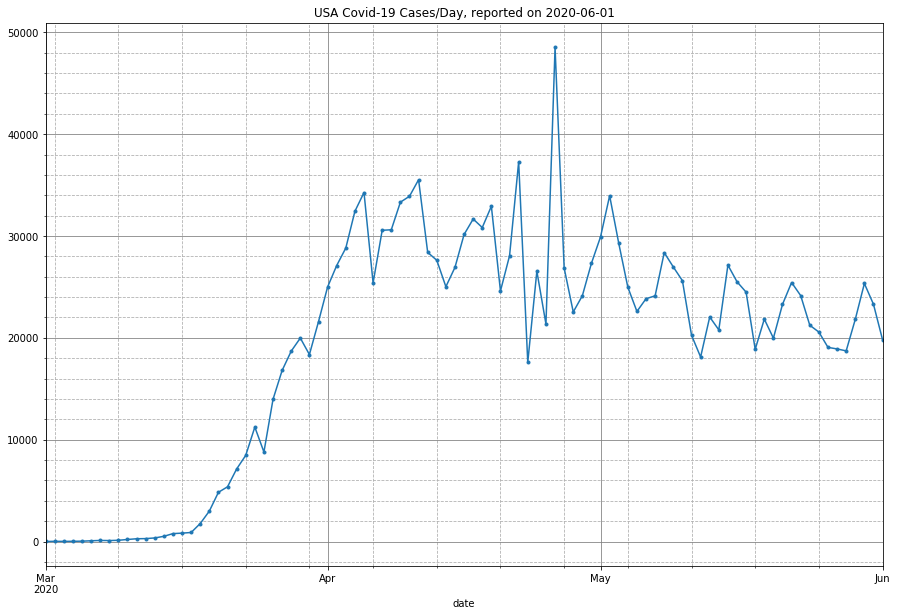

In [6]:
fig, ax = pltdflt((15,10))
lastDt = hdat["as_of"].max()
dp[[lastDt]][dp.index >= "2020/03/01"].plot(style=".-", ax=ax, legend=None)

dt = date = pd.to_datetime(lastDt).date()
plt.title(f"USA Covid-19 Cases/Day, reported on {dt}")
plt.savefig("casesPerDayLatestRawNoLegend.png", bbox_inches="tight")

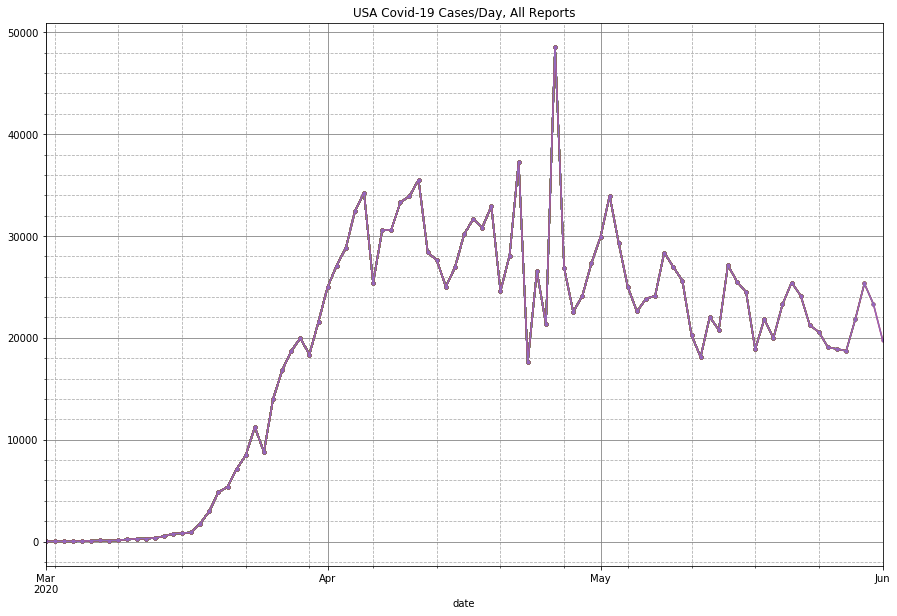

In [7]:
fig, ax = pltdflt((15,10))

dp[dp.index >= "2020/03/01"].plot(style=".-", ax=ax, legend=None)

plt.title(f"USA Covid-19 Cases/Day, All Reports")
plt.savefig("casesPerDayHistoryRawNoLegend.png", bbox_inches="tight")

In [8]:
hdatc = hdat[hdat["location"] == "United States"]
dp = hdatc.pivot_table(index="date",
                       columns="as_of",
                       values="Cases/day, 7 day avg")

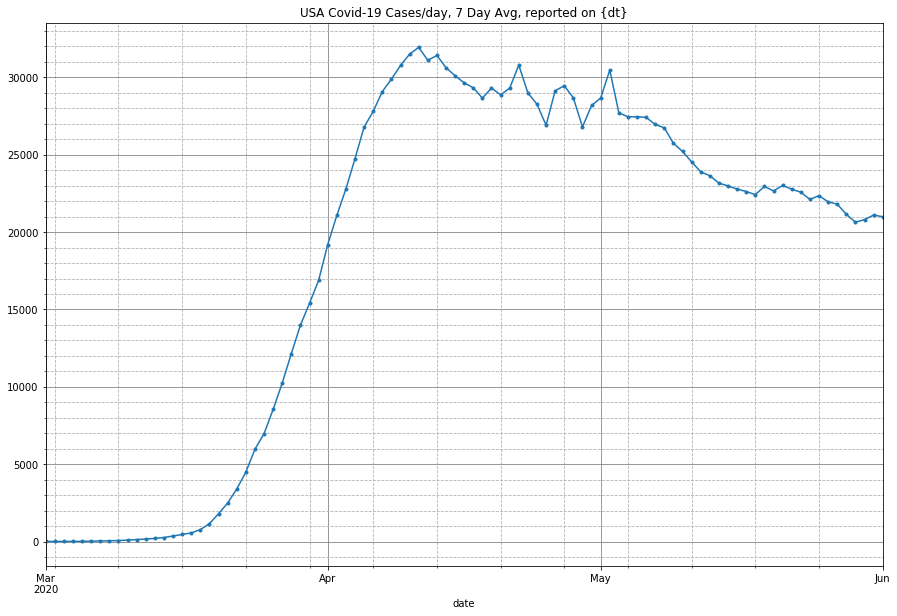

In [9]:
fig, ax = pltdflt((15,10))
dp[[lastDt]][dp.index >= "2020/03/01"].plot(style=".-", ax=ax, legend=None)

plt.title("USA Covid-19 Cases/day, 7 Day Avg, reported on {dt}")
plt.savefig("casesPerDayLatestNoLegend.png", bbox_inches="tight")